<a href="https://colab.research.google.com/github/CamilopInge/CamilopInge/blob/main/Accidentes_Transito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En una ciudad mediana con aumento de siniestros viales durante los últimos años, la secretaría de tránsito busca priorizar intervenciones (mejorar iluminación, señalización, campañas educativas, control de velocidad). Identificar factores asociados a la gravedad de los accidentes para priorizar medidas preventivas que reduzcan lesiones graves y muertes.

Interrogante:

Identificar zonas críticas (intersecciones peligrosas).

In [ ]:
#IMPORTACIONES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy import stats
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Integración de los Datos
* Fuente de datos: Archivo Excel con registros de accidentes viales.
* Dimensión inicial: 500 registros, 23 columnas.
* Resultado: DataFrame integrado con éxito. Se cargaron todos los 500 registros.

In [ ]:
# INTEGRACION DE LOS DATOS

df = pd.read_excel('accidentes_transito.xlsx')

# 2. Eliminación de Variables Irrelevantes y Redundantes
En la celda ELIMINACIÓN DE VARIABLES IRRELEVANTES Y REDUNDANTES se eliminaron las siguientes columnas del DataFrame:

* id_accidente: Esta columna fue eliminada porque es un identificador único para cada accidente y no aporta información relevante para predecir la gravedad o identificar zonas peligrosas.
* fecha_hora: Se eliminó porque se planea descomponer esta información en variables más específicas como año, mes, día y hora en pasos posteriores.
* calle_1 y calle_2: Estas columnas se consideraron redundantes con la columna id_interseccion, que identifica de manera única la ubicación de la intersección donde ocurrió el accidente.
* reportado_por: Se eliminó porque la persona que reportó el accidente no es un factor relevante para determinar la peligrosidad de la intersección.

El objetivo de este paso es simplificar el dataset, eliminando columnas que no son útiles para el análisis y que podrían introducir ruido en el modelo.

In [ ]:
# ELIMINACIÓN DE VARIABLES IRRELEVANTES Y REDUNDANTES

print("Columnas originales:", df.columns.tolist())

# Identificar variables potencialmente irrelevantes o redundantes
columnas_a_eliminar = [
    'id_accidente',  # Identificador único, no aporta información predictiva
    'fecha_hora',    # Será descompuesta en variables más útiles
    'calle_1',       # Información redundante con id_interseccion
    'calle_2',       # Información redundante con id_interseccion
    'reportado_por'  # No relevante para el análisis de peligrosidad
]

# Verificar qué columnas existen realmente en el dataset
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df = df.drop(columns=columnas_existentes)

print("Columnas después de eliminar irrelevantes:", df.columns.tolist())

Columnas originales: ['latitud', 'longitud', 'id_interseccion', 'tipo_ubicacion', 'gravedad', 'num_heridos', 'num_fallecidos', 'tipo_vehiculo', 'tipo_colision', 'iluminacion', 'clima', 'estado_via', 'limite_velocidad', 'volumen_trafico', 'clase_via', 'visibilidad', 'alcohol_involucrado', 'camara_disponible', 'nivel_peligrosidad', 'severidad_total', 'condiciones_peligrosas', 'visibilidad_mala', 'clima_lluvia_neblina', 'via_mojada_obras']
Columnas después de eliminar irrelevantes: ['latitud', 'longitud', 'id_interseccion', 'tipo_ubicacion', 'gravedad', 'num_heridos', 'num_fallecidos', 'tipo_vehiculo', 'tipo_colision', 'iluminacion', 'clima', 'estado_via', 'limite_velocidad', 'volumen_trafico', 'clase_via', 'visibilidad', 'alcohol_involucrado', 'camara_disponible', 'nivel_peligrosidad', 'severidad_total', 'condiciones_peligrosas', 'visibilidad_mala', 'clima_lluvia_neblina', 'via_mojada_obras']


# 3. Descripción Estadística de los Datos
1. Información básica del dataset:
   * print(f"Dimensiones del dataset: {df.shape}"): Muestra el número de filas y columnas del DataFrame.
   * print(f"\nTipos de datos:\n{df.dtypes}"): Muestra el tipo de dato de cada columna (ej: int64, float64, object). Esto es útil para identificar si las columnas se cargaron con el tipo de dato esperado.
2. Estadísticas descriptivas para variables numéricas:
   *  print(df.describe()): Calcula y muestra estadísticas descriptivas para las columnas numéricas del DataFrame. Incluye:
* count: Número de valores no nulos.
* mean: Media.
* std: Desviación estándar.
* min: Valor mínimo.
* 25%: Primer cuartil (percentil 25).
* 50%: Mediana (percentil 50).
* 75%: Tercer cuartil (percentil 75).
* max: Valor máximo.

3. Estadísticas para variables categóricas:
*  categorical_cols = df.select_dtypes(include=['object']).columns: Selecciona los nombres de las columnas que tienen tipo de dato 'object' (generalmente usadas para texto o categorías).
*  El bucle for col in categorical_cols: itera sobre cada columna categórica:
   * print(f"\n{col}:"): Imprime el nombre de la columna.
   * print(df[col].value_counts()): Muestra la frecuencia de cada valor único en la columna. Esto ayuda a ver la distribución de las categorías.
   * print(f"Valores únicos: {df[col].nunique()}"): Muestra el número total de valores únicos en la columna.

In [ ]:
# DESCRIPCIÓN ESTADÍSTICA DE LOS DATOS

print("="*60)
print("DESCRIPCIÓN ESTADÍSTICA COMPLETA")
print("="*60)

# Información básica del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nTipos de datos:\n{df.dtypes}")

# Estadísticas descriptivas para variables numéricas
print("="*60)
print("Estadísticas descriptivas - Variables numéricas:")
print("="*60)
print(df.describe())

# Estadísticas para variables categóricas
print("="*60)
print("Estadísticas descriptivas - Variables categóricas:")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Valores únicos: {df[col].nunique()}")

DESCRIPCIÓN ESTADÍSTICA COMPLETA
Dimensiones del dataset: (500, 24)

Tipos de datos:
latitud                   float64
longitud                  float64
id_interseccion            object
tipo_ubicacion             object
gravedad                   object
num_heridos                 int64
num_fallecidos              int64
tipo_vehiculo              object
tipo_colision              object
iluminacion                object
clima                      object
estado_via                 object
limite_velocidad            int64
volumen_trafico             int64
clase_via                  object
visibilidad                object
alcohol_involucrado        object
camara_disponible          object
nivel_peligrosidad          int64
severidad_total             int64
condiciones_peligrosas      int64
visibilidad_mala            int64
clima_lluvia_neblina        int64
via_mojada_obras            int64
dtype: object
Estadísticas descriptivas - Variables numéricas:
          latitud    longitud  num_h

# 4. Limpieza de Datos
1. Identificar valores nulos:
* print(df.isnull().sum()): Este comando cuenta la cantidad de valores faltantes (nulos) en cada columna del DataFrame. Saber cuántos valores nulos hay y en qué columnas es crucial para decidir cómo manejarlos (eliminarlos, imputarlos, etc.).
2. Identificar y manejar valores duplicados:
* duplicados = df.duplicated().sum(): Cuenta el número de filas que son exactamente iguales (duplicadas) en el DataFrame.
* if duplicados > 0: df = df.drop_duplicates() print("Valores duplicados eliminados"): Si encuentra duplicados, los elimina del DataFrame para evitar sesgos en el análisis.
3. Identificar valores inconsistentes en variables categóricas:
* El bucle for col in categorical_cols: itera sobre las columnas que fueron identificadas como categóricas en el paso anterior.
* print(f"\nValores únicos en {col}: {df[col].unique()}"): Imprime todos los valores únicos presentes en cada columna categórica. Esto ayuda a detectar inconsistencias, errores tipográficos o diferentes formas de escribir la misma categoría (ej: "sí" y "si").
4. Corregir valores inconsistentes (ejemplo):
* df['alcohol_involucrado'] = df['alcohol_involucrado'].replace({'desconocido': 'no'}): Este es un ejemplo de cómo corregir una inconsistencia. Si en la columna 'alcohol_involucrado' existiera el valor 'desconocido', lo reemplaza por 'no' (esto es un ejemplo y la estrategia de reemplazo dependerá del contexto del dato).
* df['camara_disponible'] = df['camara_disponible'].replace({'sí': 'si', 'no': 'no'}): Otro ejemplo para estandarizar los valores a 'si' o 'no'.
5. Manejar valores atípicos en variables numéricas:
* numeric_cols = df.select_dtypes(include=[np.number]).columns: Selecciona las columnas numéricas.
* El bucle for col in numeric_cols: itera sobre cada columna numérica.
* Se calcula el Z-score para cada valor (z_scores = np.abs(stats.zscore(df[col].dropna()))) para medir cuántas desviaciones estándar se aleja de la media. Los valores con un Z-score mayor a 3 suelen considerarse outliers (valores atípicos).
* outliers = len(z_scores[z_scores > 3]) print(f"{col}: {outliers} outliers"): Cuenta y muestra cuántos outliers se detectan en cada columna numérica usando este criterio. La celda identifica los outliers, pero no los elimina ni los modifica en este código, solo los reporta. El manejo específico de outliers dependerá de la estrategia de análisis (pueden ser eliminados, transformados, o dejados si se considera que representan situaciones reales aunque poco comunes).

In [ ]:
# LIMPIEZA DE DATOS

print("="*60)
print("LIMPIEZA DE DATOS")
print("="*60)

# 5.1 Identificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# 5.2 Identificar y manejar valores duplicados
duplicados = df.duplicated().sum()
print(f"\nValores duplicados: {duplicados}")
if duplicados > 0:
    df = df.drop_duplicates()
    print("Valores duplicados eliminados")

# 5.3 Identificar valores inconsistentes en variables categóricas
for col in categorical_cols:
    print(f"\nValores únicos en {col}: {df[col].unique()}")

# 5.4 Corregir valores inconsistentes (ejemplo)
df['alcohol_involucrado'] = df['alcohol_involucrado'].replace({'desconocido': 'no'})
df['camara_disponible'] = df['camara_disponible'].replace({'sí': 'si', 'no': 'no'})

# 5.5 Manejar valores atípicos en variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nDetección de outliers (valores beyond 3 std):")
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = len(z_scores[z_scores > 3])
    print(f"{col}: {outliers} outliers")

LIMPIEZA DE DATOS
Valores nulos por columna:
latitud                   0
longitud                  0
id_interseccion           0
tipo_ubicacion            0
gravedad                  0
num_heridos               0
num_fallecidos            0
tipo_vehiculo             0
tipo_colision             0
iluminacion               0
clima                     0
estado_via                0
limite_velocidad          0
volumen_trafico           0
clase_via                 0
visibilidad               0
alcohol_involucrado       0
camara_disponible         0
nivel_peligrosidad        0
severidad_total           0
condiciones_peligrosas    0
visibilidad_mala          0
clima_lluvia_neblina      0
via_mojada_obras          0
dtype: int64

Valores duplicados: 0

Valores únicos en id_interseccion: ['INT88' 'INT84' 'INT144' 'INT74' 'INT41' 'INT34' 'INT78' 'INT101'
 'INT107' 'INT56' 'INT130' 'INT147' 'INT148' 'INT18' 'INT94' 'INT13'
 'INT143' 'INT136' 'INT29' 'INT102' 'INT48' 'INT108' 'INT68' 'INT138'
 'INT

# 5. Creación de Nuevas Variables

1. **Variable objetivo: Peligrosidad de la intersección:**
* Se define una función calcular_peligrosidad que toma una fila del DataFrame como entrada.
* Esta función asigna un valor numérico a la peligrosidad basado en la columna gravedad:
   * fatal se mapea a 3
   * grave se mapea a 2
   * Cualquier otro valor (presumiblemente 'leve') se mapea a 1.
* df['nivel_peligrosidad'] = df.apply(calcular_peligrosidad, axis=1): Aplica esta función a cada fila del DataFrame (axis=1) y guarda el resultado en una nueva columna llamada nivel_peligrosidad. Esta columna numérica servirá como la variable objetivo para predecir la peligrosidad.
2. **Variables de severidad del accidente:**
* df['severidad_total'] = df['num_heridos'] + (df['num_fallecidos'] * 3): Crea una nueva columna severidad_total que combina el número de heridos y fallecidos. Se multiplica el número de fallecidos por 3 para darles un mayor peso, reflejando la mayor gravedad de una fatalidad.
3. **Variables binarias para condiciones peligrosas:**
* df['condiciones_peligrosas'] = np.where(...): Crea una variable binaria (1 o 0) llamada condiciones_peligrosas.
* Utiliza np.where para asignar 1 si alguna de las siguientes condiciones es verdadera para una fila, y 0 en caso contrario:
   * La visibilidad es 'mala' (df['visibilidad'] == 'mala')
   * El clima es 'lluvia' (df['clima'] == 'lluvia')
   * El clima es 'neblina' (df['clima'] == 'neblina')
   * El estado de la vía es 'mojado' (df['estado_via'] == 'mojado')
* Esta variable consolida varias condiciones ambientales adversas en una sola bandera.

In [ ]:
# CREACIÓN DE NUEVAS VARIABLES

print("="*60)
print("CREACIÓN DE NUEVAS VARIABLES")
print("="*60)

# Variable objetivo: Peligrosidad de la intersección
def calcular_peligrosidad(fila):
    if fila['gravedad'] == 'fatal':
        return 3
    elif fila['gravedad'] == 'grave':
        return 2
    else:
        return 1

df['nivel_peligrosidad'] = df.apply(calcular_peligrosidad, axis=1)

# Variables de severidad del accidente
df['severidad_total'] = df['num_heridos'] + (df['num_fallecidos'] * 3)

# 6.4 Variables binarias para condiciones peligrosas
df['condiciones_peligrosas'] = np.where(
    (df['visibilidad'] == 'mala') |
    (df['clima'] == 'lluvia') |
    (df['clima'] == 'neblina') |
    (df['estado_via'] == 'mojado'), 1, 0
)

print("Nuevas variables creadas:")
print(df[['nivel_peligrosidad', 'severidad_total', 'condiciones_peligrosas']].head())

CREACIÓN DE NUEVAS VARIABLES
Nuevas variables creadas:
   nivel_peligrosidad  severidad_total  condiciones_peligrosas
0                   1                0                       1
1                   1                2                       0
2                   2                4                       0
3                   2                0                       1
4                   1                1                       0


# 6. Análisis de Correlaciones

1. **Seleccionar solo columnas numéricas:**
* numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist(): Este código identifica todas las columnas en el DataFrame df que tienen un tipo de dato numérico (como int64, float64, etc.) y guarda sus nombres en una lista llamada numeric_cols. Esto es necesario porque las matrices de correlación solo se calculan para variables numéricas.
* print("Columnas numéricas:", numeric_cols): Imprime la lista de columnas numéricas identificadas.
2. **Matriz Pearson:**
* corr_pearson = df[numeric_cols].corr(method='pearson'): Calcula la matriz de correlación de Pearson para las columnas numéricas. La correlación de Pearson mide la relación lineal entre dos variables. Los valores van de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta), siendo 0 nula correlación lineal.
3. **Matriz Spearman:**
* corr_spearman = df[numeric_cols].corr(method='spearman'): Calcula la matriz de correlación de Spearman. A diferencia de Pearson, Spearman mide la correlación de rango entre dos variables. Es útil cuando la relación no es estrictamente lineal o cuando tienes variables ordinales. También va de -1 a +1.
4. **Guardar a excel si lo quieres:**
* corr_pearson.to_excel('corr_pearson.xlsx'): Guarda la matriz de correlación de Pearson en un archivo Excel llamado 'corr_pearson.xlsx'.
* corr_spearman.to_excel('corr_spearman.xlsx'): Guarda la matriz de correlación de Spearman en un archivo Excel llamado 'corr_spearman.xlsx'. Esto te permite ver los valores de correlación en detalle fuera del notebook.
5. **Visualizar heatmap (Pearson):**
* plt.figure(figsize=(12,9)): Crea una figura para el gráfico con un tamaño específico.
* sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1): Genera un mapa de calor (heatmap) de la matriz de correlación de Pearson.
   * annot=True: Muestra los valores de correlación en las celdas del heatmap.
   * fmt=".2f": Formatea los valores mostrados con dos decimales.
   * cmap='coolwarm': Define el esquema de colores, donde los colores fríos (azules) indican correlaciones negativas y los colores cálidos (rojos) indican correlaciones positivas.
   * vmin=-1, vmax=1: Establece los límites del rango de colores para que vayan de -1 a 1, facilitando la interpretación.
* plt.title('Correlación Pearson - variables numéricas'): Establece el título del gráfico.
plt.show(): Muestra el gráfico.
6. **Visualizar heatmap (Spearman):**
* Estos pasos son idénticos a los anteriores, pero utilizan la matriz de correlación de Spearman (corr_spearman) para generar un heatmap con el título correspondiente.

Columnas numéricas: ['latitud', 'longitud', 'num_heridos', 'num_fallecidos', 'limite_velocidad', 'volumen_trafico', 'nivel_peligrosidad', 'severidad_total', 'condiciones_peligrosas']


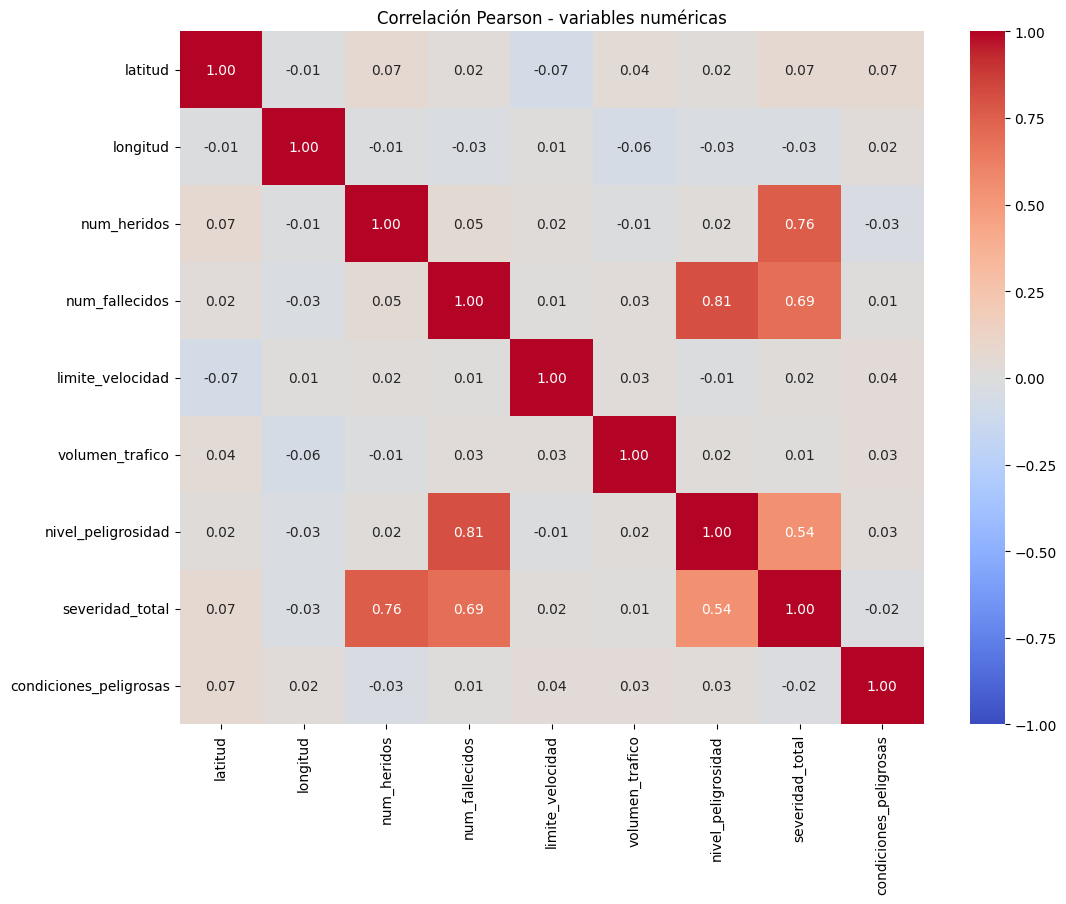

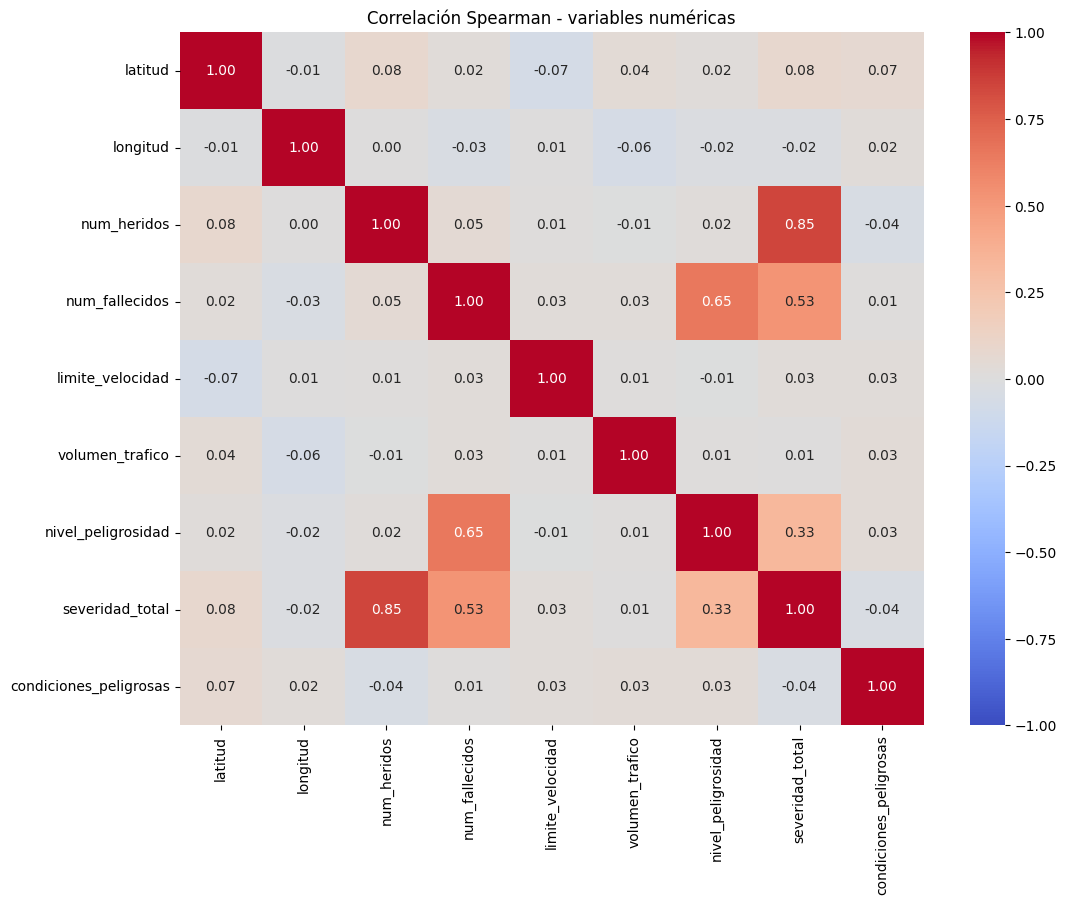

In [ ]:
# ANÁLISIS DE CORRELACIONES

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", numeric_cols)

# Matriz Pearson
corr_pearson = df[numeric_cols].corr(method='pearson')
# Matriz Spearman
corr_spearman = df[numeric_cols].corr(method='spearman')

# Guardar a excel si lo quieres
corr_pearson.to_excel('corr_pearson.xlsx')
corr_spearman.to_excel('corr_spearman.xlsx')

# Visualizar heatmap (Pearson)
plt.figure(figsize=(12,9))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Pearson - variables numéricas')
plt.show()

# Visualizar heatmap (Spearman)
plt.figure(figsize=(12,9))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Spearman - variables numéricas')
plt.show()

In [ ]:
# 1. Asegurarse que la variable objetivo es numérica
df['nivel_peligrosidad'] = pd.to_numeric(df['nivel_peligrosidad'], errors='coerce')

# 2. Seleccionar solo columnas numéricas válidas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 3. Calcular correlación Spearman
corr_matrix = df[numeric_cols].corr(method='spearman')

# 4. Extraer correlación con la variable objetivo
if 'nivel_peligrosidad' in corr_matrix.columns:
    corr_with_target_spearman = corr_matrix['nivel_peligrosidad'].sort_values(ascending=False)
    print("Correlación (Spearman) con nivel_peligrosidad:\n", corr_with_target_spearman)

    # 5. Mostrar las 10 variables más correlacionadas
    print("\nTop 10 variables correlacionadas con nivel_peligrosidad (Spearman):")
    print(corr_with_target_spearman.abs().sort_values(ascending=False).head(10))
else:
    print("⚠️ La variable 'nivel_peligrosidad' no está en la matriz de correlación. Revisa el dataset.")


Correlación (Spearman) con nivel_peligrosidad:
 nivel_peligrosidad        1.000000
num_fallecidos            0.652611
severidad_total           0.332035
condiciones_peligrosas    0.034981
num_heridos               0.019157
latitud                   0.017418
volumen_trafico           0.014744
limite_velocidad         -0.006963
longitud                 -0.023253
Name: nivel_peligrosidad, dtype: float64

Top 10 variables correlacionadas con nivel_peligrosidad (Spearman):
nivel_peligrosidad        1.000000
num_fallecidos            0.652611
severidad_total           0.332035
condiciones_peligrosas    0.034981
longitud                  0.023253
num_heridos               0.019157
latitud                   0.017418
volumen_trafico           0.014744
limite_velocidad          0.006963
Name: nivel_peligrosidad, dtype: float64


**ESE EJEMPLO CREERIA QUE SE PUEDE ELIMINAR, MIRA A VER**

In [ ]:
# ejemplo: si 'condiciones_peligrosas' es binaria 0/1
if 'condiciones_peligrosas' in df.columns:
    r, p = pointbiserialr(df['condiciones_peligrosas'].fillna(0), df['severidad_total'].fillna(0))
    print("Point-biserial r:", r, "p-value:", p)

Point-biserial r: -0.016828254681435617 p-value: 0.707380862992426


# Tabla resumen con estadísticos y p-values - Correlacion Pearson con p-values

1. def pearson_with_p(x, y):: Define una función auxiliar llamada pearson_with_p que toma dos series (x e y) como entrada. Su propósito es calcular tanto el coeficiente de correlación de Pearson (r) como el p-value (p).
   * mask = x.notnull() & y.notnull(): Crea una máscara booleana para seleccionar solo los casos donde ambas series (x e y) tienen valores no nulos. Esto es importante porque la correlación de Pearson requiere pares de datos completos.
    * if mask.sum() < 3: return (np.nan, np.nan): Si después de eliminar los nulos quedan menos de 3 pares de datos, no es posible calcular una correlación fiable, por lo que la función devuelve NaN para r y p.
    * r, p = stats.pearsonr(x[mask], y[mask]): Utiliza la función pearsonr de la librería scipy.stats para calcular el coeficiente de correlación de Pearson (r) y el p-value (p) solo en los datos donde la máscara es True.
return r, p: Devuelve los valores calculados de r y p.
2. target = 'nivel_peligrosidad': Define la variable objetivo que se utilizará para el cálculo de la correlación.
3. results = []: Inicializa una lista vacía para almacenar los resultados de la correlación para cada variable.
4. for col in numeric_cols:: Inicia un bucle que itera sobre cada nombre de columna en la lista numeric_cols (que contiene las columnas numéricas identificadas anteriormente).
   * if col==target: continue: Salta la iteración si la columna actual es la variable objetivo (nivel_peligrosidad) para evitar calcular la correlación de la variable objetivo consigo misma.
   * r, p = pearson_with_p(df[col], df[target]): Llama a la función pearson_with_p para calcular la correlación y el p-value entre la columna actual (df[col]) y la variable objetivo (df[target]).
   * results.append({'variable':col, 'pearson_r':r, 'p_value':p, 'n': df[col].notnull().sum()}): Agrega un diccionario a la lista results con el nombre de la variable (variable), el coeficiente de Pearson (pearson_r), el p-value (p_value) y el número de observaciones no nulas utilizadas (n).
5. res_df = pd.DataFrame(results).sort_values(...): Convierte la lista results en un DataFrame de pandas y luego lo ordena. La ordenación se realiza por el valor absoluto de pearson_r en orden descendente (ascending=False), lo que significa que las variables con la correlación más fuerte (positiva o negativa) aparecerán primero.
6. res_df.to_excel('correlacion_con_target.xlsx', index=False): Guarda el DataFrame resultante en un archivo Excel llamado 'correlacion_con_target.xlsx'. index=False evita escribir el índice del DataFrame en el archivo.
7. res_df.head(30): Muestra las primeras 30 filas del DataFrame ordenado. Esto te permite ver rápidamente cuáles son las variables numéricas más correlacionadas con la gravedad del accidente, junto con sus p-values. Un p-value bajo (comúnmente < 0.05) sugiere que la correlación observada es estadísticamente significativa y no probable que sea producto del azar.

In [ ]:
# Tabla resumen con estadísticos y p-values - Correlacion Pearson con p-values
def pearson_with_p(x, y):
    mask = x.notnull() & y.notnull()
    if mask.sum() < 3:
        return (np.nan, np.nan)
    r, p = stats.pearsonr(x[mask], y[mask])
    return r, p

target = 'nivel_peligrosidad'
results = []
for col in numeric_cols:
    if col==target: continue
    r, p = pearson_with_p(df[col], df[target])
    results.append({'variable':col, 'pearson_r':r, 'p_value':p, 'n': df[col].notnull().sum()})

res_df = pd.DataFrame(results).sort_values('pearson_r', key=lambda s: s.abs(), ascending=False)
res_df.to_excel('correlacion_con_target.xlsx', index=False)
res_df.head(30)


,variable,pearson_r,p_value,n
3,num_fallecidos,0.807610,2.666037e-116,500
6,severidad_total,0.541270,2.124347e-39,500
7,condiciones_peligrosas,0.030432,4.971737e-01,500
1,longitud,-0.025773,5.653283e-01,500
2,num_heridos,0.021509,6.313672e-01,500
0,latitud,0.019868,6.576309e-01,500
5,volumen_trafico,0.019279,6.671496e-01,500
4,limite_velocidad,-0.014175,7.518601e-01,500


# 6. TRANSFORMACION DE TIPO DE DATO SEGUN EL METODO

 La celda TRANSFORMACION DE TIPO DE DATO SEGUN EL METODO se dedica a ajustar los tipos de datos de varias columnas en el DataFrame df para asegurarse de que sean apropiados para los análisis y modelos que se aplicarán posteriormente. Esto es crucial porque muchos algoritmos de machine learning y funciones estadísticas requieren tipos de datos específicos (por ejemplo, numéricos o categóricos).

1. Fecha/hora -> datetime + variables temporales:
* if 'fecha_hora' in df.columns:: Verifica si la columna 'fecha_hora' existe en el DataFrame (recuerda que se eliminó en un paso anterior, por lo que esta parte del código no se ejecutaría con el DataFrame actual).
* df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce'): Intenta convertir la columna 'fecha_hora' a tipo datetime. errors='coerce' convierte los valores que no pueden ser parseados a NaT (Not a Time).
* Se extraen componentes temporales: year, month, day, hour, weekday en nuevas columnas.
* df['is_night'] = np.where(...): Crea una variable binaria is_night (1 si es de noche, 0 si es de día), basándose en la hora.
2. Coordenadas a float:
* for c in ['latitud', 'longitud']:: Itera sobre las columnas 'latitud' y 'longitud'.
* if c in df.columns:: Verifica si la columna existe.
* df[c] = pd.to_numeric(df[c], errors='coerce'): Convierte las columnas a tipo numérico (float), manejando errores de conversión con errors='coerce'.
3. Conteos a enteros:
* for c in ['num_heridos', 'num_fallecidos']:: Itera sobre las columnas 'num_heridos' y 'num_fallecidos'.
* if c in df.columns:: Verifica si la columna existe.
* df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int): Convierte a numérico, reemplaza posibles nulos con 0 y luego convierte a tipo entero.
4. Nivel de peligrosidad:
* gravedad_map = {'fatal':5, 'grave':3, 'leve':1, 'FATAL':5, 'GRAVE':3, 'LEVE':1}: Define un diccionario para mapear los valores de texto de 'gravedad' a valores numéricos (5, 3, 1). Se incluyen mayúsculas por si hay inconsistencias.
* if 'gravedad' in df.columns:: Si la columna 'gravedad' existe, la mapea a nivel_peligrosidad usando el diccionario, reemplazando valores no mapeados con 1 (asumiendo 'leve').
* else:: Si 'gravedad' no existe, crea nivel_peligrosidad basándose en una combinación ponderada de 'num_fallecidos' y 'num_heridos'.
5. Variables binarias/flags simples derivadas:
* Se crean nuevas columnas binarias (0 o 1) basadas en condiciones específicas de otras columnas:
  *  visibilidad_mala: 1 si la visibilidad es 'mala' o 'reducida'.
   * clima_lluvia_neblina: 1 si el clima es 'lluvia', 'neblina' o 'tormenta'.
   * via_mojada_obras: 1 si el estado de la vía es 'mojado' o 'con obras'.
* Estas transformaciones convierten condiciones categóricas en indicadores numéricos que pueden ser más fáciles de usar en modelos.

In [ ]:
# TRANSFORMACION DE TIPO DE DATO SEGUN EL METODO

# Fecha/hora -> datetime + variables temporales
if 'fecha_hora' in df.columns:
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')
    df['year'] = df['fecha_hora'].dt.year
    df['month'] = df['fecha_hora'].dt.month
    df['day'] = df['fecha_hora'].dt.day
    df['hour'] = df['fecha_hora'].dt.hour
    df['weekday'] = df['fecha_hora'].dt.weekday
    df['is_night'] = np.where(df['hour'].isna(), np.nan, ((df['hour'] < 6) | (df['hour'] >= 18)).astype(int))

# Coordenadas a float
for c in ['latitud', 'longitud']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Conteos a enteros
for c in ['num_heridos', 'num_fallecidos']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

# Nivel de peligrosidad: si existe 'gravedad' usar mapeo; si no, crearlo a partir de conteos
gravedad_map = {'fatal':5, 'grave':3, 'leve':1, 'FATAL':5, 'GRAVE':3, 'LEVE':1}
if 'gravedad' in df.columns:
    df['nivel_peligrosidad'] = df['gravedad'].map(gravedad_map).fillna(1).astype(int)
else:
    df['nivel_peligrosidad'] = (df.get('num_fallecidos',0).fillna(0).astype(int)*5) + df.get('num_heridos',0).fillna(0).astype(int)

# Variables binarias/flags simples derivadas (útiles para métodos que requieren numéricos)
if 'visibilidad' in df.columns:
    df['visibilidad_mala'] = df['visibilidad'].str.lower().isin(['mala','reducida']).astype(int)
if 'clima' in df.columns:
    df['clima_lluvia_neblina'] = df['clima'].str.lower().isin(['lluvia','neblina','tormenta']).astype(int)
if 'estado_via' in df.columns:
    df['via_mojada_obras'] = df['estado_via'].str.lower().isin(['mojado','con obras']).astype(int)


# REDUCCIÓN DE VARIABLES (usando ANOVA F-test)

Esta celda se enfoca en seleccionar las variables más relevantes para predecir la variable objetivo (`nivel_peligrosidad`) utilizando la prueba F de ANOVA. Esto ayuda a simplificar el modelo, reducir el ruido y potencialmente mejorar el rendimiento y la interpretabilidad.

1.  **Copia del dataset**: Se crea una copia del DataFrame original para no modificarlo durante el proceso.
2.  **Imputación de valores faltantes**: Se llenan los valores faltantes en columnas numéricas con la mediana y en columnas categóricas con la cadena "missing", ya que la técnica de selección no maneja nulos.
3.  **Codificación de variables categóricas**: Las variables categóricas con pocos valores únicos (<= 10) se codifican usando One-Hot Encoding (creando columnas binarias), y las que tienen muchos valores únicos se codifican usando Label Encoding (asignando números enteros).
4.  **Definir variable objetivo**: Se especifica que `nivel_peligrosidad` es la variable que queremos predecir.
5.  **Separar X (predictoras) e y (target)**: Se divide el DataFrame en dos partes: `X` con las variables predictoras y `y` con la variable objetivo.
6.  **Seleccionar las 10 variables más relevantes con ANOVA F-test**: Se utiliza `SelectKBest` con la función de puntuación `f_classif` (ANOVA F-test) para identificar y seleccionar las 10 variables con la mayor capacidad para explicar la varianza en la variable objetivo.
7.  **Reconstruir DataFrame reducido**: Se crea un nuevo DataFrame con solo las variables seleccionadas.

El resultado es un subconjunto de las variables originales que, según la prueba F de ANOVA, son las más relevantes para predecir el nivel de peligrosidad de los accidentes.


In [ ]:
# REDUCCIÓN DE VARIABLES (usando ANOVA F-test)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Copia del dataset
df_sel = df.copy()

# 2. Imputación de valores faltantes
for c in df_sel.select_dtypes(include=['int64','float64']).columns:
    df_sel[c] = df_sel[c].fillna(df_sel[c].median())

for c in df_sel.select_dtypes(include=['object','category']).columns:
    if str(df_sel[c].dtype) == "category":
        df_sel[c] = df_sel[c].cat.add_categories("missing").fillna("missing")
    else:
        df_sel[c] = df_sel[c].fillna("missing")

# 3. Codificación de variables categóricas
for c in df_sel.select_dtypes(include=['object','category']).columns:
    if df_sel[c].nunique() <= 10:
        df_sel = pd.get_dummies(df_sel, columns=[c], prefix=c)
    else:
        le = LabelEncoder()
        df_sel[c] = le.fit_transform(df_sel[c].astype(str))

# 4. Definir variable objetivo
target = "nivel_peligrosidad"

# 5. Separar X (predictoras) e y (target)
X = df_sel.drop(target, axis=1)
y = df_sel[target]

# 6. Seleccionar las 10 variables más relevantes con ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# 7. Reconstruir DataFrame reducido
X_reduced = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

print("✅ Reducción de variables completada")
print("Variables seleccionadas:", X_reduced.columns.tolist())

✅ Reducción de variables completada
Variables seleccionadas: ['id_interseccion', 'num_fallecidos', 'severidad_total', 'clima_lluvia_neblina', 'gravedad_fatal', 'gravedad_grave', 'gravedad_leve', 'tipo_vehiculo_automóvil', 'clima_neblina', 'estado_via_seco']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


# BALANCEO DE DATOS

Aquí balanceé mis datos para abordar el desequilibrio de clases en la variable objetivo `nivel_peligrosidad`. Como vimos en la descripción estadística, la mayoría de los accidentes son de gravedad 'leve', mientras que los 'graves' y 'fatales' son menos frecuentes. Este desequilibrio puede causar que un modelo predictivo se incline a predecir la clase mayoritaria y tenga un bajo rendimiento en la detección de las clases minoritarias (los accidentes más peligrosos).

Para mitigar esto, utilicé técnicas de sobremuestreo (`SMOTE` o `RandomOverSampler`) y, si fue posible, submuestreo (`RandomUnderSampler`) de la librería `imblearn`. Mi objetivo es que cada nivel de peligrosidad tenga una cantidad similar de ejemplos para entrenar un modelo de manera más efectiva.

Verifiqué el tamaño de las clases y, dependiendo de si alguna clase tenía menos de 2 muestras (lo cual impediría a SMOTE funcionar correctamente), apliqué diferentes estrategias:

*   Si alguna clase minoritaria tenía solo 1 muestra, usé `RandomOverSampler` como un método seguro para duplicar aleatoriamente esas instancias.
*   Si todas las clases minoritarias tenían 2 o más muestras, intenté un pipeline que primero aplica `RandomUnderSampler` para reducir ligeramente la clase mayoritaria y luego `SMOTE` para sintetizar nuevas muestras en las clases minoritarias. Esto ayuda a equilibrar las clases sin crear demasiadas instancias duplicadas exactas.
*   Si el pipeline RUS+SMOTE falló (por ejemplo, si `sampling_strategy` no era adecuado para el caso multiclase), intenté solo `SMOTE`.
*   Como último recurso si SMOTE también falló, volví a `RandomOverSampler`.

Después de aplicar la técnica de balanceo, imprimí la distribución de clases resultante para confirmar que el proceso fue exitoso y que ahora tengo un dataset más equilibrado (`X_bal_df`, `y_bal_ser`) listo para la siguiente etapa, que sería escalar las variables numéricas y preparar los datos para el entrenamiento del modelo.

In [ ]:
# BALANCEO DE DATOS

from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Asumimos:
# - X_reduced es DataFrame (resultado del SelectKBest/f_classif)
# - y es la serie target (nivel_peligrosidad)
# Si no, adaptarlos:
try:
    X_final = X_reduced.copy()
except:
    X_final = pd.DataFrame(X_reduced)

# Asegurar y como entero/categórico
y = y.astype(int)

print("Distribución ORIGINAL de clases:", Counter(y))

# Comprobación de tamaños por clase (SMOTE necesita al menos 2+ muestras por clase)
class_counts = Counter(y)
min_count = min(class_counts.values())

# Estrategia:
# - Si alguna clase tiene <2 muestras -> usar RandomOverSampler (no sintetiza con kNN)
# - Si todas las clases tienen >=2 muestras -> intentar pipeline rus + SMOTE
if min_count < 2:
    print("⚠️ Hay clases con menos de 2 muestras. Usaremos RandomOverSampler (fallback seguro).")
    ros = RandomOverSampler(random_state=42)
    X_bal, y_bal = ros.fit_resample(X_final.fillna(0), y)
    print("Distribución tras RandomOverSampler:", Counter(y_bal))
else:
    # Pipeline: undersample ligero -> SMOTE
    rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # reduce mayoría al 70% de la minoría
    smote = SMOTE(random_state=42)
    imb_pipeline = ImbPipeline(steps=[('rus', rus), ('smote', smote)])
    try:
        X_bal, y_bal = imb_pipeline.fit_resample(X_final.fillna(0), y)
        print("✅ Pipeline RUS + SMOTE aplicado correctamente.")
        print("Distribución tras balanceo:", Counter(y_bal))
    except Exception as e:
        print("⚠️ Pipeline RUS+SMOTE falló:", e)
        # Intentar solo SMOTE si RUS+SMOTE falla
        try:
            X_bal, y_bal = SMOTE(random_state=42).fit_resample(X_final.fillna(0), y)
            print("✅ SMOTE aplicado como fallback.")
            print("Distribución tras SMOTE:", Counter(y_bal))
        except Exception as e2:
            print("❌ SMOTE también falló:", e2)
            # Ultimo recurso: RandomOverSampler
            ros = RandomOverSampler(random_state=42)
            X_bal, y_bal = ros.fit_resample(X_final.fillna(0), y)
            print("✅ RandomOverSampler aplicado como último recurso.")
            print("Distribución tras RandomOverSampler:", Counter(y_bal))

# Reconstruir DataFrame / Series con índices nuevos
X_bal_df = pd.DataFrame(X_bal, columns=X_final.columns)
y_bal_ser = pd.Series(y_bal, name=y.name)

print("\nTamaños finales: X =", X_bal_df.shape, " y =", y_bal_ser.shape)
print("Clases finales:", Counter(y_bal_ser))

# Opcional: mostrar unas filas
display(X_bal_df.head())
display(y_bal_ser.value_counts())

# NOTA: Para entrenar modelos, es recomendable escalar X_bal_df (StandardScaler) después de este paso
# y usar cross-validation estratificada (StratifiedKFold) para preservar balance en folds.


Distribución ORIGINAL de clases: Counter({1: 347, 3: 101, 5: 52})
⚠️ Pipeline RUS+SMOTE falló: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.
✅ SMOTE aplicado como fallback.
Distribución tras SMOTE: Counter({1: 347, 3: 347, 5: 347})

Tamaños finales: X = (1041, 10)  y = (1041,)
Clases finales: Counter({1: 347, 3: 347, 5: 347})


,id_interseccion,num_fallecidos,severidad_total,clima_lluvia_neblina,gravedad_fatal,gravedad_grave,gravedad_leve,tipo_vehiculo_automóvil,clima_neblina,estado_via_seco
0,131.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,127.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,47.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,116.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,82.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,count
nivel_peligrosidad,
1,347
3,347
5,347
